# 03. PyTorch Computer Vision Exercises

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "mps" if  torch.backends.mps.is_built()\
    else "gpu" if torch.cuda.is_available() else "cpu"
print(device)

2.1.0.dev20230709
mps


### 1. What are 3 areas in industry where computer vision is currently being used?

- **Manufacturing and Quality Control:** -> to ensure product quality, detect defects, and streamline production. Cameras and machine learning algorithms can inspect products in real-time, identifying any abnormalities, deviations, or flaws. This application helps maintain consistency and reduces human error, ultimately leading to improved product quality and efficiency.

- **Autonomous Vehicles:** -> self-driving cars and other autonomous vehicles. Computer vision plays a crucial role in these systems by allowing vehicles to perceive and interpret their surroundings. Cameras, LiDAR, and other sensors capture data, which is then processed by computer vision algorithms to identify objects, pedestrians, road signs, and lane markings, enabling the vehicle to make informed decisions and navigate safely.

- **Healthcare:** -> aiding in medical imaging analysis, diagnostics, and surgical assistance. Medical imaging technologies, such as MRI, CT scans, and X-rays, generate vast amounts of visual data that can be processed using computer vision algorithms. This enables medical professionals to detect and diagnose conditions more accurately and efficiently, leading to improved patient outcomes and enhanced medical decision-making.

### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

> **model becomes overly complex and overly specific to the training data noise and individual examples.**

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- **regularization** -> introduce regularization techniques like L1 (Lasso) and L2 (Ridge) regularization to the model's loss function
- **dropout** -> randomly selected neurons are "dropped out" (i.e., temporarily removed) from the network
- **early stopping** -> monitor the model's performance on a validation set during training and stop the training process when the performance starts to degrade


### 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

### 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms

from torchvision.transforms import ToTensor

In [3]:
# load the data
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=torchvision.transforms.ToTensor(),
                            target_transform=None)
test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=torchvision.transforms.ToTensor(),
                           target_transform=None)
len(train_data), len(test_data)

(60000, 10000)

### 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
# visulize
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

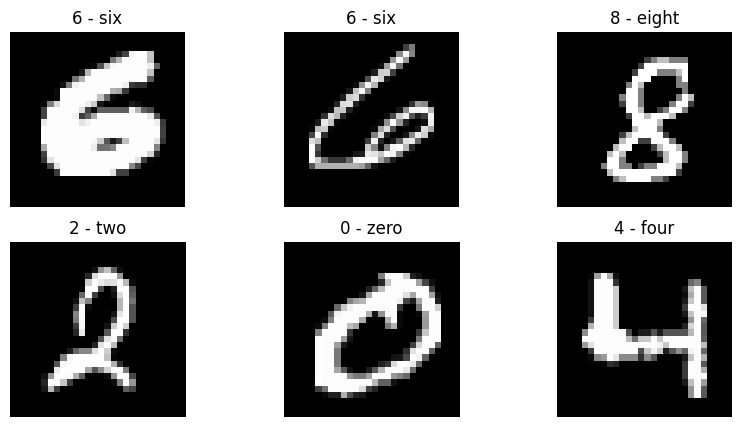

In [6]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

fig = plt.figure(figsize=(10, 5))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    random_inx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_inx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x15a89b040>,
 <torch.utils.data.dataloader.DataLoader at 0x15a89afe0>)

In [8]:
print("Length of train_dataloader:", len(train_dataloader), " -> batches of", BATCH_SIZE)
print("Length of test_dataloader:", len(test_dataloader), " -> batches of", BATCH_SIZE)

Length of train_dataloader: 1875  -> batches of 32
Length of test_dataloader: 313  -> batches of 32


### 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
from torch import nn

class CNNModel(nn.Module):
    def __init__(self, input_shape: int, hidden_unit: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit * 7 * 7, out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print("shape after first conv:", x.shape)
        x = self.conv_block_2(x)
        # print("shape after 2nd conv:", x.shape)
        x = self.classifier(x)
        # print("shape after classifier:", x.shape)
        return x

In [10]:
torch.manual_seed(42)
# input_shape -> color channels
model_0 = CNNModel(input_shape=1, hidden_unit=10, output_shape=len(class_names))
model_0

CNNModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [11]:
# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=10)
acc_fn

MulticlassAccuracy()

### 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
# create function for training and testing loop
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """ performs a training step with model trying to learn on dataloader """
    train_loss, train_acc = 0, 0
    model.to(device)

    # put model into training mode
    model.train()

    # loop through training batches
    for batch, (X, y) in enumerate(dataloader):
        # put data on target device
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        # compute and accumulate train loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # divide total train loss and accuracy by the length of train dataloader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [13]:
def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device):    
    """ performs a testing step on model going over dataloader """
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)

            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y_test)
        
        # adjust metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [14]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device=None):
    """ prints difference between start and end time """
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

#### 9.1 train the model on CPU

In [15]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    """ training """
    train_step(model_0, train_dataloader, loss_fn, optimizer, acc_fn, "cpu")

    """ testing """
    test_step(model_0, test_dataloader, loss_fn, acc_fn, "cpu")

# calculate training time
train_time_end_cpu = timer()
print_train_time(train_time_start_cpu, train_time_end_cpu, "cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.30239 | Train acc: 0.90%
Test loss: 0.06645 | Test acc: 0.98%

Epoch: 1
-------
Train loss: 0.07800 | Train acc: 0.98%
Test loss: 0.07087 | Test acc: 0.98%

Epoch: 2
-------
Train loss: 0.05899 | Train acc: 0.98%
Test loss: 0.05508 | Test acc: 0.98%

Epoch: 3
-------
Train loss: 0.04986 | Train acc: 0.98%
Test loss: 0.05509 | Test acc: 0.98%

Epoch: 4
-------
Train loss: 0.04421 | Train acc: 0.99%
Test loss: 0.04576 | Test acc: 0.99%

Train time on cpu : 183.638 seconds


183.6378320419999

#### 9.2 train the model on GPU -> MPS

In [16]:
torch.manual_seed(42)
# input_shape -> color channels
model_1 = CNNModel(input_shape=1, hidden_unit=10, output_shape=len(class_names)).to(device)
model_1, next(model_1.parameters()).device

(CNNModel(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 device(type='mps', index=0))

In [17]:
# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


def acc_fn(y_pred, y_true):
    """ Calculates accuracy between truth labels and predictions """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [18]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
train_time_start_mps = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    """ training """
    train_step(model_1, train_dataloader, loss_fn, optimizer, acc_fn, device)

    """ testing """
    test_step(model_1, test_dataloader, loss_fn, acc_fn, device)

# calculate training time
train_time_end_mps = timer()
print_train_time(train_time_start_mps, train_time_end_mps, device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.36252 | Train acc: 88.01%
Test loss: 0.09236 | Test acc: 97.05%

Epoch: 1
-------
Train loss: 0.08609 | Train acc: 97.30%
Test loss: 0.07272 | Test acc: 97.49%

Epoch: 2
-------
Train loss: 0.06790 | Train acc: 97.92%
Test loss: 0.06460 | Test acc: 97.79%

Epoch: 3
-------
Train loss: 0.05992 | Train acc: 98.18%
Test loss: 0.06266 | Test acc: 97.89%

Epoch: 4
-------
Train loss: 0.05427 | Train acc: 98.30%
Test loss: 0.04958 | Test acc: 98.39%

Train time on mps : 55.033 seconds


55.03251058399837

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

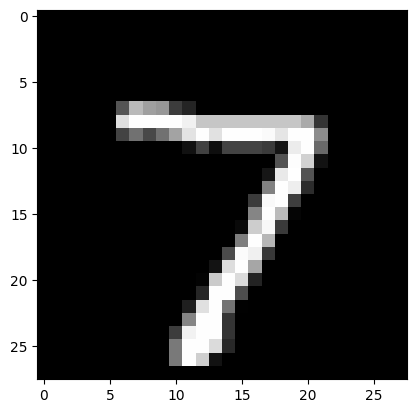

In [19]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [20]:
# define a function to make predictions
def make_pred(model:nn.Module, data:list, device:torch.device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # forward pass
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # save to list and transfer to cpu
            pred_probs.append(pred_prob.cpu())

    # stacks the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [21]:
import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# check the shape
test_samples[0].shape, test_labels[0]

(torch.Size([1, 28, 28]), 8)

In [22]:
pred_probs = make_pred(model_1, test_samples, device)
# turn probabilities into labels
pred_class = pred_probs.argmax(dim=1)
pred_class

tensor([8, 4, 1, 8, 9, 1, 6, 3, 5])

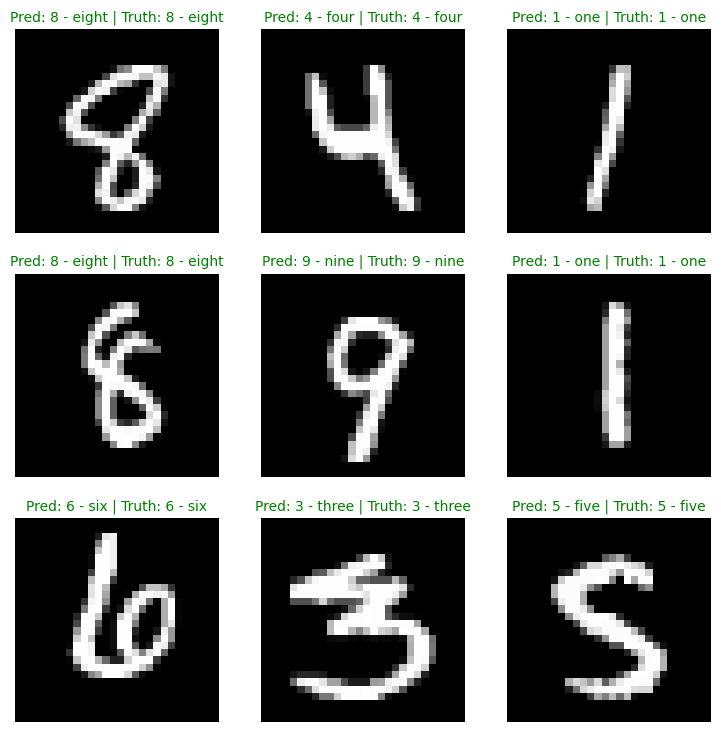

In [23]:
plt.figure(figsize=(9,9))
for i, sample in enumerate(test_samples):
    plt.subplot(3,3,i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_class[i]]
    truth_label = class_names[test_labels[i]]

    title_test = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_test, fontsize=10, c="g")
    else:
        plt.title(title_test, fontsize=10, c="r")

    plt.axis(False)

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

### 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?